# Deteksi Komunitas

In [6]:
!pip install networkx
!pip install matplotlib
!pip install numpy
!pip install python-louvain
!pip install pyvis
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 56.7 MB/s  0:00:006m0:00:01


===== RINGKASAN DATA FACEBOOK COMBINED =====
Total Node (Akun):                4039
Total Edge (Pertemanan):          88234
Total Degree (Total Hubungan):    176468
Rata-rata Degree per Node:        43.69

Jumlah Komunitas Terdeteksi : 16

================ 16 KOMUNITAS TERBESAR ================

1. Komunitas 10
   Jumlah Anggota: 548
   Anggota (Node/Akun):
   [1085, 3437, 3454, 3487, 3723, 3861, 3961, 857, 862, 865, 868, 3456, 3495, 3586, 3621, 3626, 3797, 3501, 3517, 3550, 3577, 3592, 3609, 3633, 3677, 3684, 3721, 3779, 3872, 3948, 3440, 3525, 3540, 3556, 3561, 3651, 3674, 3692, 3741, 3750, 3756, 3830, 3851, 3877, 3886, 3943, 3962, 3438, 3439, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3455, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3496, 3497, 3498, 3499, 3500, 3502, 3503

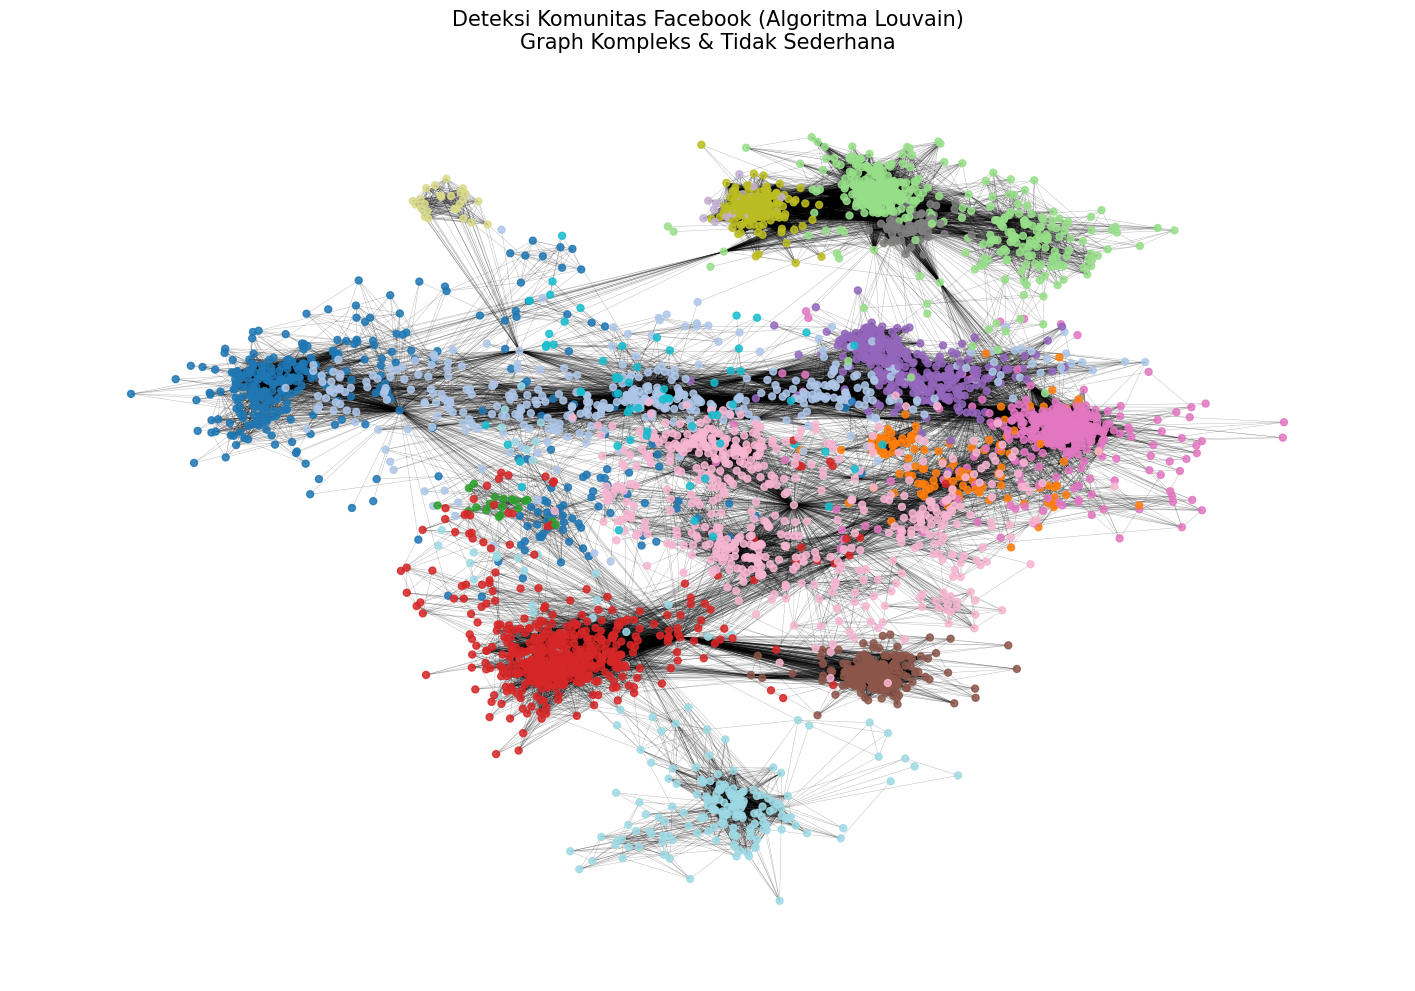

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import numpy as np
import random

# -----------------------------------------------------------
# 1. Load dataset facebook_combined
# -----------------------------------------------------------
path = "Data/facebook_combined.txt"

# Hitung total baris data (jumlah edge dalam file txt)
with open(path, "r") as f:
    total_rows = sum(1 for line in f)

# Load graph
G = nx.read_edgelist(path, create_using=nx.Graph(), nodetype=int)

# Hitung statistik jaringan
total_nodes = G.number_of_nodes()
total_edges = G.number_of_edges()
total_degree = sum(dict(G.degree()).values())   # total semua degree

# -----------------------------------------------------------
# RINGKASAN DATA
# -----------------------------------------------------------
print("===== RINGKASAN DATA FACEBOOK COMBINED =====")
print(f"Total Node (Akun):                {total_nodes}")
print(f"Total Edge (Pertemanan):          {total_edges}")
print(f"Total Degree (Total Hubungan):    {total_degree}")
print(f"Rata-rata Degree per Node:        {total_degree/total_nodes:.2f}")
print("=============================================\n")


# -----------------------------------------------------------
# 2. Deteksi komunitas (Algoritma Louvain)
# -----------------------------------------------------------
partition = community_louvain.best_partition(G)
num_communities = len(set(partition.values()))
print("Jumlah Komunitas Terdeteksi :", num_communities)

# -----------------------------------------------------------
# 3. Visualisasi 2D graph (kompleks)
# -----------------------------------------------------------
plt.figure(figsize=(18, 12))

pos = nx.spring_layout(G, k=0.15, iterations=50)
colors = [partition[node] for node in G.nodes()]

nx.draw_networkx_nodes(
    G, pos,
    node_size=25,
    node_color=colors,
    cmap=plt.cm.tab20,
    alpha=0.85
)

nx.draw_networkx_edges(
    G, pos,
    width=0.3,
    alpha=0.3
)

# ===========================================================
# 4. ANALISIS KOMUNITAS TERBESAR + DAFTAR ANGGOTA
# ===========================================================

from collections import defaultdict

# Buat dictionary komunitas: id_komunitas -> list[node]
communities = defaultdict(list)
for node, comm in partition.items():
    communities[comm].append(node)

# Konversi jadi list tuple (id_komunitas, jumlah_anggota, list_node)
community_sizes = []
for comm_id, members in communities.items():
    community_sizes.append((comm_id, len(members), members))

# Urutkan komunitas berdasarkan jumlah anggota (descending)
community_sizes_sorted = sorted(community_sizes, key=lambda x: x[1], reverse=True)

print("\n================ 16 KOMUNITAS TERBESAR ================")
for i, (comm_id, size, members) in enumerate(community_sizes_sorted[:16], 1):
    print(f"\n{i}. Komunitas {comm_id}")
    print(f"   Jumlah Anggota: {size}")
    print(f"   Anggota (Node/Akun):")
    print(f"   {members}")   # langsung tampilkan list node
print("===========================================================\n")


# ===========================================================
# 5. TEMAN NODE 0 DALAM KOMUNITAS YANG SAMA
# ===========================================================

target_node = 0

if target_node not in G.nodes():
    print(f"Node {target_node} tidak ada dalam graph!")
else:
    komunitas_node0 = partition[target_node]
    semua_teman_node0 = list(G.neighbors(target_node))

    # Filter: hanya teman yang berada di komunitas yang sama
    teman_satu_komunitas = [
        n for n in semua_teman_node0 if partition[n] == komunitas_node0
    ]

    print(f"\n===== TEMAN NODE {target_node} DALAM KOMUNITAS {komunitas_node0} =====")
    print(f"Total teman node {target_node}: {len(semua_teman_node0)}")
    print(f"Teman yang berada di komunitas yang sama: {len(teman_satu_komunitas)}")
    print("Daftar teman satu komunitas:")
    print(teman_satu_komunitas)
    print("===========================================================\n")


plt.title("Deteksi Komunitas Facebook (Algoritma Louvain)\nGraph Kompleks & Tidak Sederhana", fontsize=15)
plt.axis('off')
plt.show()
